In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.isnull().values.any()

np.True_

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df = df.fillna(0)

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
df["meal"].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [10]:
df["children"].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [11]:
df["adults"].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [12]:
df["babies"].unique()

array([ 0,  1,  2, 10,  9])

In [13]:
len(df[df["adults"] == 0]) 

403

In [14]:
filter = (df["children"] == 0) & (df["adults"] == 0) & (df["babies"] == 0)
df[filter] # step 1 menghapus data fiktif

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data = df[~filter] # data fiktif terhapus
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


Analisa 1

In [16]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [17]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)] # memisahkan data Resort Hotel & City Hotel
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [18]:
resort.shape

(28927, 32)

In [19]:
city.shape

(46084, 32)

In [20]:
labels = resort["country"].value_counts().index
values = resort["country"].value_counts()
values

country
PRT    10184
GBR     5922
ESP     3105
IRL     1734
FRA     1399
       ...  
BHS        1
TGO        1
MAC        1
HKG        1
DJI        1
Name: count, Length: 119, dtype: int64

In [21]:
import plotly.graph_objs as go

trace = go.Pie(labels = labels,
                values = values, 
               hoverinfo="label+percent", 
               textinfo = "value")

fig = go.Figure(data = [trace])
fig.update_layout(width = 400, height = 400)
fig.show()

In [22]:
wise = data[data["is_canceled"] == 0]["country"].value_counts().reset_index() # reset_index untuk diubah menjadi kolom baru
wise.columns = ["country", "no of guests"]
wise

,country,no of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,KIR,1
162,ATF,1
163,TJK,1
164,SLE,1


In [23]:
import plotly_express as px

map_guest =  px.choropleth(wise,
                         locations = wise["country"],
                         color = wise["no of guests"],
                         hover_name = wise["country"],
                         title = "Home Country Of Guests")

map_guest.show()

Analisa 2

In [24]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [25]:
data2 = data[data["is_canceled"] == 0]
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


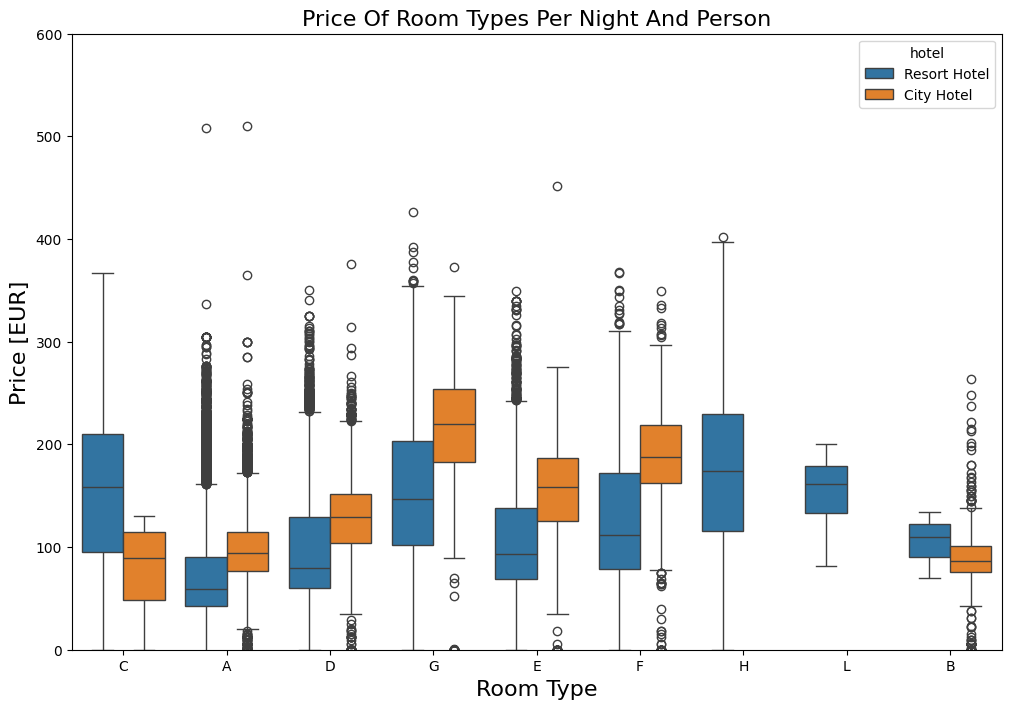

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "reserved_room_type",
                y = "adr",
                hue = "hotel",
                data = data2)
plt.title("Price Of Room Types Per Night And Person", fontsize = 16)
plt.xlabel("Room Type", fontsize = 16)
plt.ylabel("Price [EUR]", fontsize = 16)
plt.ylim(0, 600)
plt.show()

Analisa 3

In [27]:
data_resort = resort[resort["is_canceled"] == 0]
data_city = city[city["is_canceled"] == 0]

In [28]:
resort_hotel = data_resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_hotel = data_resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()


In [29]:
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [30]:
city_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [31]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")
final.columns = ["month", "price_for_resort", "price_for_city_hotel"]
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,75.867816
1,August,181.205892,181.205892
2,December,68.410104,68.410104
3,February,54.147478,54.147478
4,January,48.761125,48.761125
5,July,150.122528,150.122528
6,June,107.974850,107.974850
7,March,57.056838,57.056838
8,May,76.657558,76.657558
9,November,48.706289,48.706289


In [32]:
import sort_dataframeby_monthorweek as sd

final2 = sd.Sort_Dataframeby_Month(df = final, monthcolumnname = "month")
final2

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,48.761125
1,February,54.147478,54.147478
2,March,57.056838,57.056838
3,April,75.867816,75.867816
4,May,76.657558,76.657558
5,June,107.974850,107.974850
6,July,150.122528,150.122528
7,August,181.205892,181.205892
8,September,96.416860,96.416860
9,October,61.775449,61.775449


In [33]:
px.line(final2, x = "month", y = ["price_for_resort", "price_for_city_hotel"])

In [34]:
px.line(final, x = "month", y = ["price_for_resort", "price_for_city_hotel"])

Analisa 4

In [35]:
data[["hotel", "market_segment", "stays_in_weekend_nights", "stays_in_week_nights"]]

,hotel,market_segment,stays_in_weekend_nights,stays_in_week_nights
0,Resort Hotel,Direct,0,0
1,Resort Hotel,Direct,0,0
2,Resort Hotel,Direct,0,1
3,Resort Hotel,Corporate,0,1
4,Resort Hotel,Online TA,0,2
...,...,...,...,...
119385,City Hotel,Offline TA/TO,2,5
119386,City Hotel,Online TA,2,5
119387,City Hotel,Online TA,2,5
119388,City Hotel,Online TA,2,5


<Axes: xlabel='market_segment', ylabel='stays_in_week_nights'>

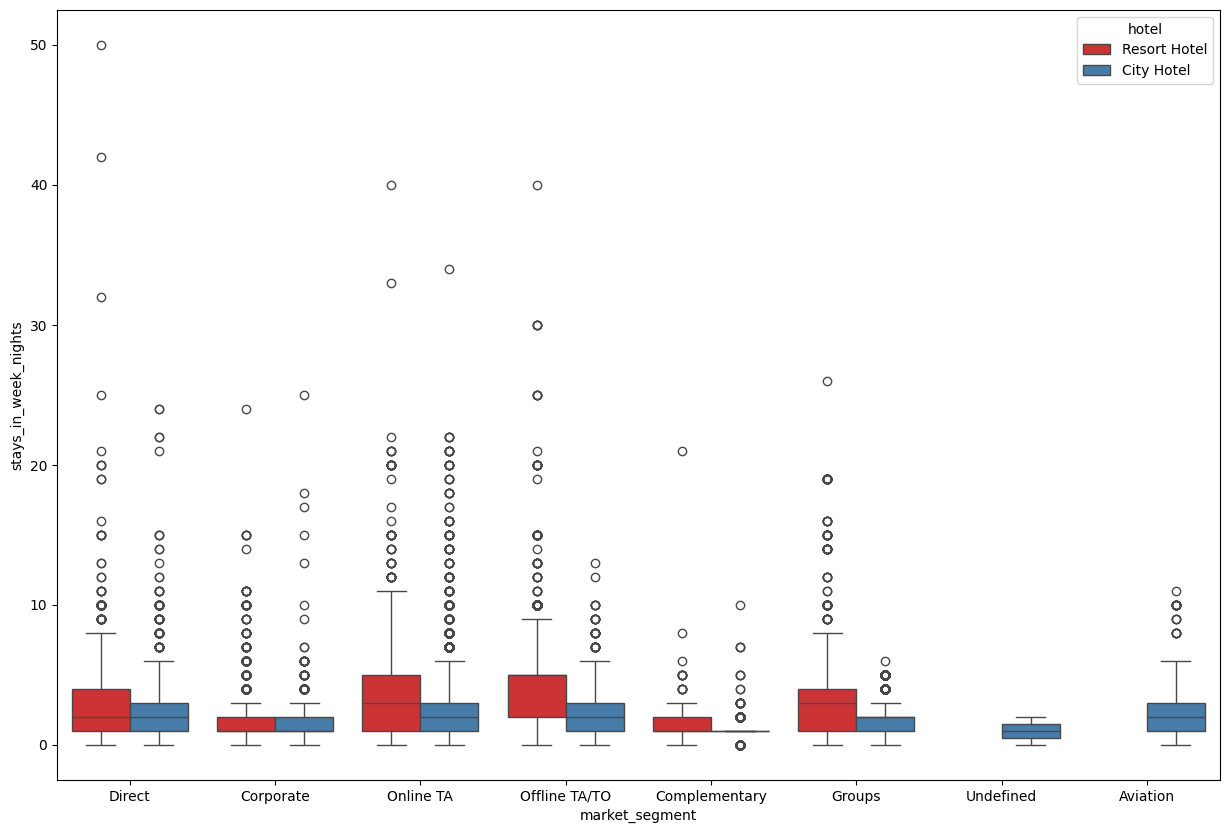

In [36]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment",
            y = "stays_in_week_nights",
            data = data,
            hue = "hotel",
            palette = "Set1")

Analisa 5

<Axes: xlabel='market_segment', ylabel='adr'>

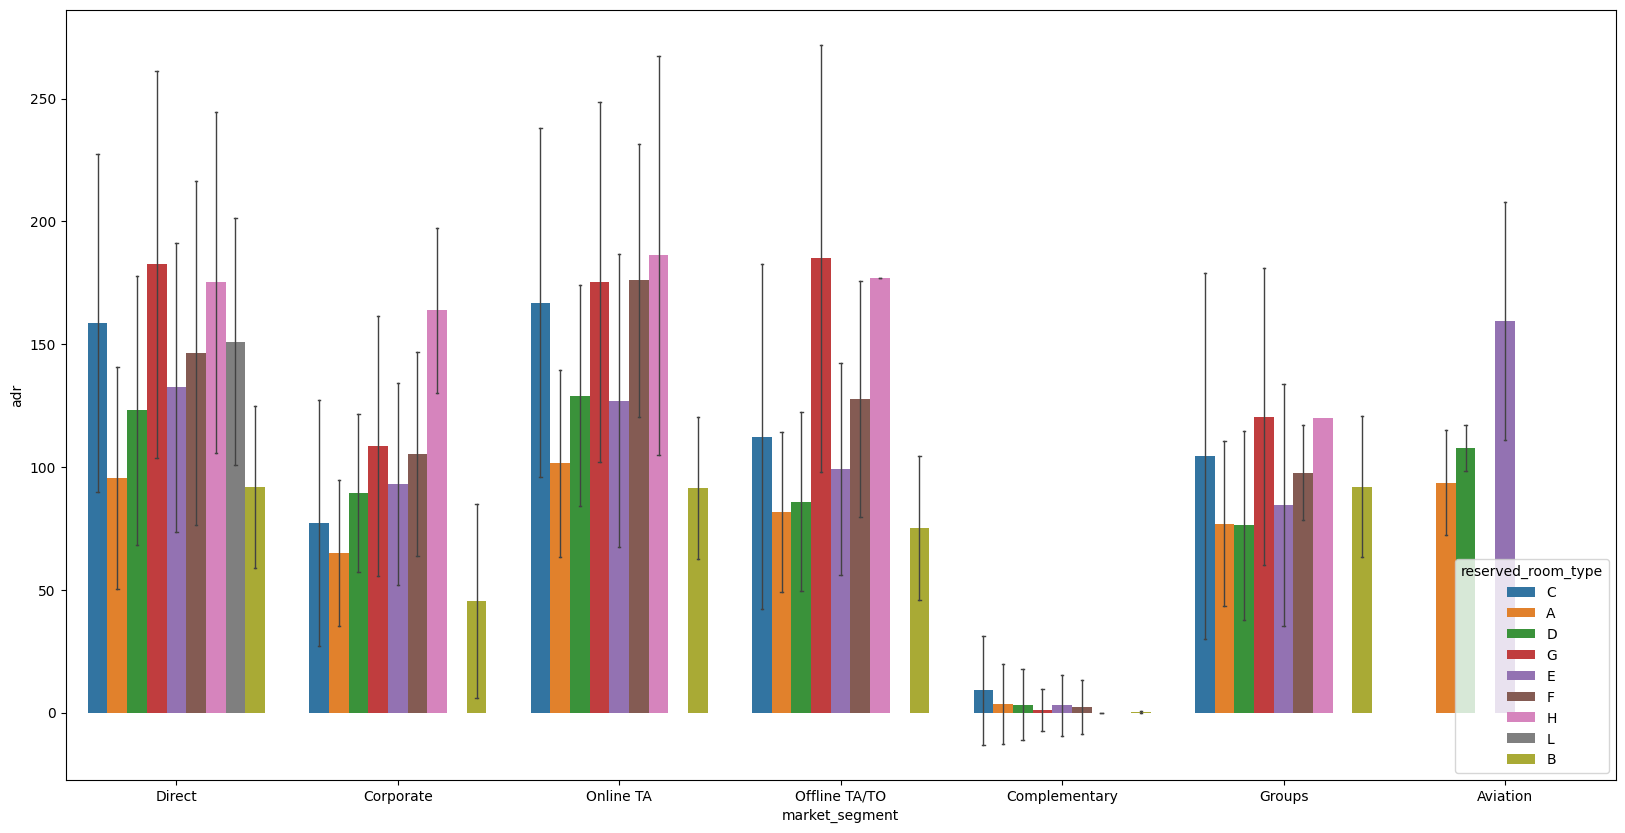

In [37]:
filter = data["is_canceled"] == 0
clean_data = data[filter]

plt.figure(figsize=(20,10))
sns.barplot(x = "market_segment",
            y = "adr",
            hue = "reserved_room_type",
            data = clean_data,
            errorbar = "sd",
            err_kws = {'linewidth': 1},
            capsize = 0.1)

ASSIGNMENT

In [38]:
filter = (df["meal"] == "Undefined")
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


1

In [39]:
meal = df["meal"].value_counts()
meal

meal
BB    92310
HB    14463
SC    10650
FB      798
Name: count, dtype: int64

In [40]:
trace = go.Pie(labels = meal.index,
                values = meal, 
               hoverinfo="label+percent", 
               textinfo = "value")

fig = go.Figure(data = [trace])
fig.update_layout(width = 400, height = 400)
fig.show()

2

In [41]:
booking = df.groupby(["hotel", "meal"])["meal"].value_counts()
booking

hotel         meal
City Hotel    BB      62305
              FB         44
              HB       6417
              SC      10564
Resort Hotel  BB      30005
              FB        754
              HB       8046
              SC         86
Name: count, dtype: int64

3

In [42]:
df["total_of_special_requests"]

0         0
1         0
2         0
3         0
4         1
         ..
119385    0
119386    2
119387    4
119388    0
119389    2
Name: total_of_special_requests, Length: 118221, dtype: int64

In [43]:
special_request = df["total_of_special_requests"].value_counts()
special_request

total_of_special_requests
0    69300
1    33121
2    12932
3     2488
4      340
5       40
Name: count, dtype: int64

4

In [44]:
is_cancel = df.groupby(["is_canceled", "total_of_special_requests"])["total_of_special_requests"].value_counts()
is_cancel = is_cancel.reset_index()
is_cancel


,is_canceled,total_of_special_requests,count
0,0,0,36005
1,0,1,25820
2,0,2,10073
3,0,3,2043
4,0,4,304
5,0,5,38
6,1,0,33295
7,1,1,7301
8,1,2,2859
9,1,3,445


<Axes: xlabel='is_canceled', ylabel='count'>

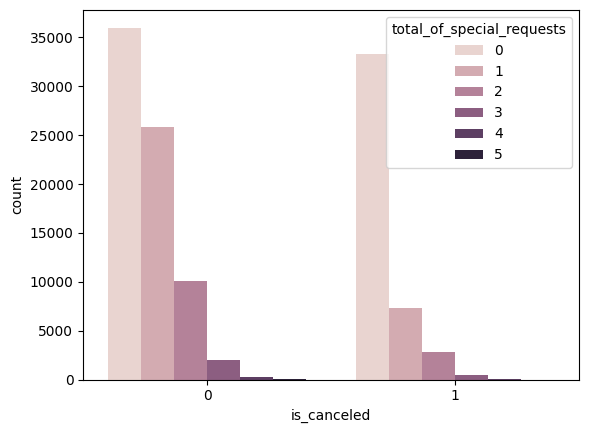

In [45]:
sns.barplot(x = "is_canceled", y = "count", hue = "total_of_special_requests", data = is_cancel)

5

In [46]:
month = df.groupby("arrival_date_month")["hotel"].value_counts()
month

arrival_date_month  hotel       
April               City Hotel      7480
                    Resort Hotel    3449
August              City Hotel      8983
                    Resort Hotel    4851
December            City Hotel      4132
                    Resort Hotel    2381
February            City Hotel      4965
                    Resort Hotel    2871
January             City Hotel      3736
                    Resort Hotel    2064
July                City Hotel      8088
                    Resort Hotel    4529
June                City Hotel      7894
                    Resort Hotel    2996
March               City Hotel      6458
                    Resort Hotel    3163
May                 City Hotel      8232
                    Resort Hotel    3547
November            City Hotel      4357
                    Resort Hotel    2383
October             City Hotel      7605
                    Resort Hotel    3553
September           City Hotel      7400
                    Reso

In [47]:
grouped = df.groupby(["arrival_date_month", "hotel"])["hotel"].count().unstack()
grouped.columns = ["jumlah tamu resort", "jumlah tamu city hotel"]
sorted_data = grouped.reset_index()
sorted_data = sorted_data.sort_values(by=["jumlah tamu resort", "jumlah tamu city hotel"], ascending=False)
print(sorted_data)

   arrival_date_month  jumlah tamu resort  jumlah tamu city hotel
1              August                8983                    4851
8                 May                8232                    3547
5                July                8088                    4529
6                June                7894                    2996
10            October                7605                    3553
0               April                7480                    3449
11          September                7400                    3104
7               March                6458                    3163
3            February                4965                    2871
9            November                4357                    2383
2            December                4132                    2381
4             January                3736                    2064


6

In [48]:
from sort_dataframeby_monthorweek import Sort_Dataframeby_Month

sorted_df = Sort_Dataframeby_Month(df=sorted_data, monthcolumnname="arrival_date_month")
print(sorted_df)


   arrival_date_month  jumlah tamu resort  jumlah tamu city hotel
0             January                3736                    2064
1            February                4965                    2871
2               March                6458                    3163
3               April                7480                    3449
4                 May                8232                    3547
5                June                7894                    2996
6                July                8088                    4529
7              August                8983                    4851
8           September                7400                    3104
9             October                7605                    3553
10           November                4357                    2383
11           December                4132                    2381


7

In [55]:
px.line(sorted_df, x = "arrival_date_month", y = ['jumlah tamu resort', 'jumlah tamu city hotel'])

8

In [58]:
filter = (df["market_segment"] == "Undefined")
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [60]:
market_segment = df["market_segment"].value_counts()
market_segment

market_segment
Online TA        56461
Offline TA/TO    23961
Groups           19010
Direct           12533
Corporate         5280
Complementary      737
Aviation           237
Name: count, dtype: int64

In [61]:
trace = go.Pie(labels = market_segment.index,
                values = market_segment, 
               hoverinfo="label+percent", 
               textinfo = "value")

fig = go.Figure(data = [trace])
fig.update_layout(width = 400, height = 400)
fig.show()